# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Aldo Miguel Arroyo Castro
+ Juan Luis Vicente Bórquez Ormeño

**Correos Electrónicos:**

+ ald.arroyo@duocuc.cl
+ jua.borquez@duocuc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Introducción

TODO

# Carga de datos y preprocesamiento de datos

In [1]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-10 22:41:55--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 142.251.167.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  16.4MB/s    in 0.6s    

2025-04-10 22:41:56 (16.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-10 22:41:57--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 142.251.179.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [ap

In [2]:
!ls -lh

total 12M
-rw-r--r--. 1 root users 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r--. 1 root users 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r--. 1 root users 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r--. 1 root users  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [3]:
import gzip
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
# Asegurar que las etiquetas están en formato correcto
from keras.utils import to_categorical

2025-04-10 22:42:00.129058: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 22:42:00.172670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 22:42:00.173127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 22:42:00.174540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 22:42:00.182437: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 22:42:00.182742: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Carga de imágenes

In [4]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


In [5]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Muestra imágenes

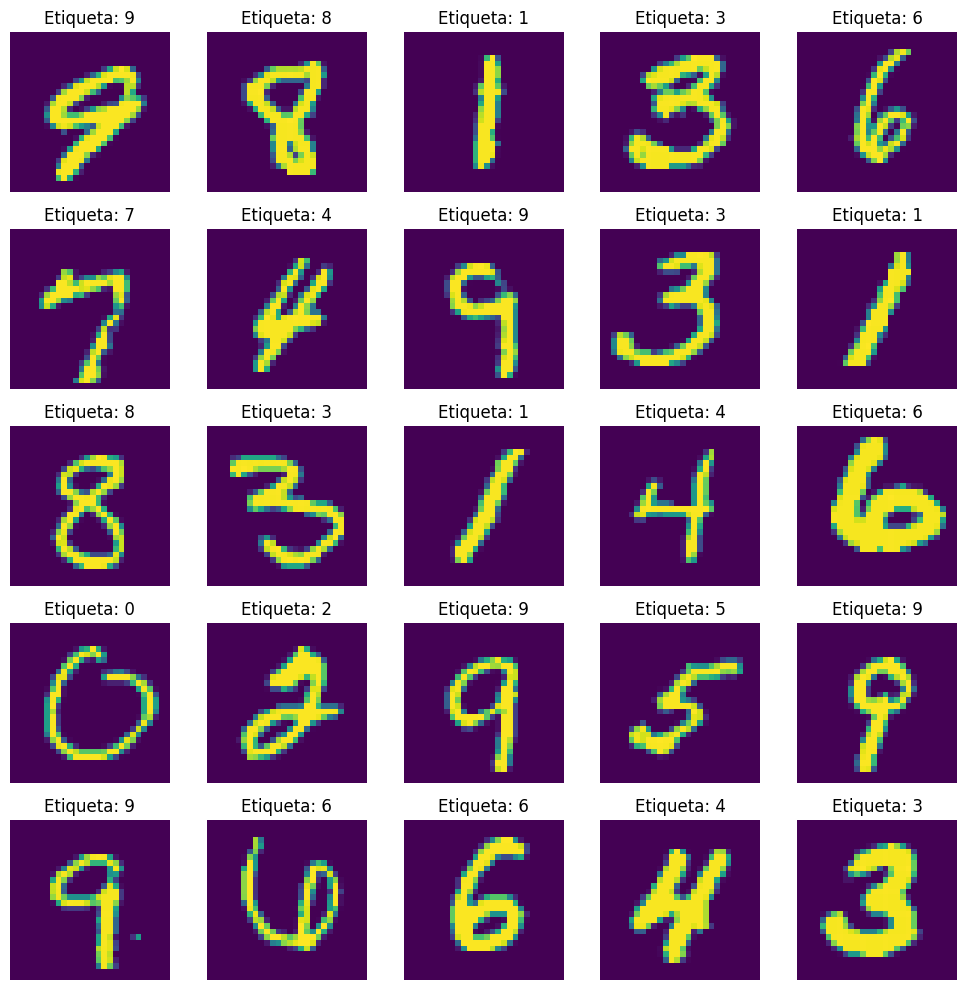

In [6]:
h = 5  # alto de la grilla
w = 5  # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2*w, 2*h))

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(X_test))
        axs[i, j].imshow(X_test[ex].reshape(28, 28))
        axs[i, j].set_title(f"Etiqueta: {np.argmax(y_test[ex])}")
        axs[i, j].axis('off')  # Oculta los ejes

plt.tight_layout()
plt.show()

# Definición del modelo

## Optimizador: SGD + Momentum

In [7]:
M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = y_train.shape[1]

print(N, C, M_train, M_test)

784 10 60000 10000


In [8]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)


# Se crea la red feed-forward tiene 3 capas escondidas

h1 = 128
h2 = 64

red_sgd = keras.Sequential(name="MLP_sgd")
red_sgd.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_sgd.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red_sgd.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
red_sgd.add(keras.layers.Dense(C, activation='softmax', name='capa_de_salida'))


red_sgd.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy', 'Precision', 'Recall', 'F1Score']
)

In [9]:
hist_sgd = red_sgd.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test,y_test)
        )

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8861 - precision: 0.9386 - recall: 0.8436 - f1_score: 0.8849 - val_loss: 0.1714 - val_accuracy: 0.9464 - val_precision: 0.9571 - val_recall: 0.9386 - val_f1_score: 0.9459
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1429 - accuracy: 0.9570 - precision: 0.9655 - recall: 0.9505 - f1_score: 0.9566 - val_loss: 0.1247 - val_accuracy: 0.9585 - val_precision: 0.9666 - val_recall: 0.9534 - val_f1_score: 0.9581
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0990 - accuracy: 0.9690 - precision: 0.9741 - recall: 0.9648 - f1_score: 0.9687 - val_loss: 0.0925 - val_accuracy: 0.9709 - val_precision: 0.9738 - val_recall: 0.9682 - val_f1_score: 0.9707
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0789 - accuracy: 0.9759 - precision: 0.9794 - recall: 0.9728 - f1_score: 0.9757 - val_loss: 0.0913 - val_accuracy: 0.9715 - val_pr

## Optimizador: ADAM

In [10]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)


# Se crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 128
h2 = 64

red_adam = keras.Sequential(name="MLP_adam")
red_adam.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_adam.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red_adam.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
red_adam.add(keras.layers.Dense(C, activation='softmax', name='capa_de_salida'))


red_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall', 'F1Score']
)

In [11]:
hist_adam = red_adam.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test,y_test)
        )

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2817 - accuracy: 0.9176 - precision: 0.9498 - recall: 0.8877 - f1_score: 0.9167 - val_loss: 0.1471 - val_accuracy: 0.9540 - val_precision: 0.9617 - val_recall: 0.9463 - val_f1_score: 0.9537
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1095 - accuracy: 0.9670 - precision: 0.9728 - recall: 0.9623 - f1_score: 0.9668 - val_loss: 0.1096 - val_accuracy: 0.9648 - val_precision: 0.9706 - val_recall: 0.9607 - val_f1_score: 0.9644
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0784 - accuracy: 0.9761 - precision: 0.9798 - recall: 0.9729 - f1_score: 0.9760 - val_loss: 0.0921 - val_accuracy: 0.9719 - val_precision: 0.9751 - val_recall: 0.9685 - val_f1_score: 0.9716
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0610 - accuracy: 0.9804 - precision: 0.9828 - recall: 0.9783 - f1_score: 0.9803 - val_loss: 0.0916 - val_accuracy: 0.9722 - val_pr

Justificación de las configuraciones utilizadas.

# Evaluación del modelo:

Uso de métricas como accuracy, precision, recall y F1-score.

# Análisis y mejora del modelo:

Comparación de distintas configuraciones y ajustes realizados.

# Conclusiones:

Reflexión sobre el desempeño del modelo y posibles mejoras.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9dc7e3b2-3914-4a2d-83b3-47dbec5af292' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>